In [1]:
#!../venv/bin/python
import os
import json
import pandas
import matplotlib.pyplot as plt
import numpy as np
import argparse

In [2]:
pwd

'C:\\Users\\Robin\\Documents\\Gray\\productivity-tools\\issue_grapher\\python'

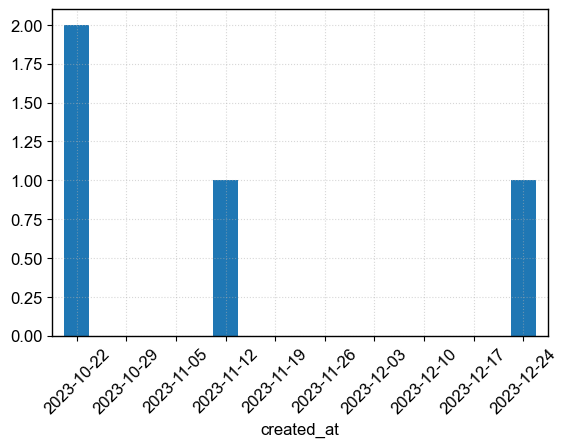

In [27]:
# parser = argparse.ArgumentParser(
#     prog='ProgramName',
#     description='What the program does',
#     epilog='Text at the bottom of help')

# parser.add_argument('--issue')

# args = parser.parse_args()

# Load the json containing the github issue data.
# dictionary = json.load(open(f'./logs/{args.issue}.json', 'r'))
# dictionary = json.load(open(os.path.join('..', '83596.json'), 'r'))
dictionary = json.load(open(os.path.join('..', 'test.json'), 'r'))

df = pandas.DataFrame(data=dictionary)

# Cast created_at from string to pandas date and then group by week.
# TODO: this might be offset by a week in the future.
df['created_at']=pandas.to_datetime(df['created_at'])
df3 = df.groupby([pandas.Grouper(key='created_at', freq='W')]).count()

fig, ax = plt.subplots()

# Show date for at most 10 bars on x axis
tick_step_size = round(len(df3['id']) / 10)
df3['id'].plot(kind="bar", stacked=True, ax=ax)
xLabels = ['']*len(df3['id'])
xLabels[::tick_step_size] = [x.strftime("%Y-%m-%d") for x in df3['id'].index[::tick_step_size]]
ax.set_xticklabels(xLabels, rotation=45)

# Add padding so the dates don't get cut off.
plt.subplots_adjust(bottom=0.2)

plt.show()
# Save to outputs folder.
# plt.savefig(f'./outputs/{args.issue}.png')


# Formatting with base plt parameters

In [4]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 1

plt.rcParams['axes.linewidth'] = 1
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['grid.alpha'] = 0.5

In [5]:
df

id                               node_id  \
0    119777972  MDEzOklzc3VlUmVhY3Rpb24xMTk3Nzc5NzI=   
1    126043188  MDEzOklzc3VlUmVhY3Rpb24xMjYwNDMxODg=   
2    139431536           REA_lAHOAeUeuM42Byi2zghPjnA   
3    139744643           REA_lAHOAeUeuM42Byi2zghUVYM   
4    140715348           REA_lAHOAeUeuM42Byi2zghjJVQ   
..         ...                                   ...   
350  190611990           REA_lAHOAeUeuM42Byi2zgtcghY   
351  190689582           REA_lAHOAeUeuM42Byi2zgtdsS4   
352  190919886           REA_lAHOAeUeuM42Byi2zgthNM4   
353  190991110           REA_lAHOAeUeuM42Byi2zgtiSwY   
354  190998430           REA_lAHOAeUeuM42Byi2zgtiZ54   

                                                  user content  \
0    {'login': 'mbinfokyaw', 'id': 57422473, 'node_...      +1   
1    {'login': 'windows7lake', 'id': 10578898, 'nod...      +1   
2    {'login': 'ldasilva-net', 'id': 11092091, 'nod...      +1   
3    {'login': 'bhanuka96', 'id': 34953062, 'node_i...      +1   
4    {'login': 'AleksMx', 'id': 4531547, 'node_id':...      +1   
..                                                 ...     ...   
350  {'login': 'chipweinberger', 'id': 1863934, 'no...      +1   
351  {'login': 'mvolpato', 'id': 7138011, 'node_id'...      +1   
352  {'login': 'SahharWithu', 'id': 127301191, 'nod...      +1   
353  {'login': 'icelija', 'id': 15613998, 'node_id'...      +1   
354  {'login': 'jiaming0708', 'id': 8855285, 'node_...      +1   

                   created_at  
0   2021-07-13 03:16:10+00:00  
1   2021-08-30 01:18:36+00:00  
2   2021-12-02 14:49:26+00:00  
3   2021-12-05 18:03:23+00:00  
4   2021-12-11 09:04:13+00:00  
..                        ...  
350 2024-02-10 20:22:25+00:00  
351 2024-02-14 09:49:26+00:00  
352 2024-02-23 14:21:50+00:00  
353 2024-02-27 08:39:17+00:00  
354 2024-02-27 13:16:42+00:00  

[355 rows x 5 columns]

In [17]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, MaxNLocator, AutoLocator)

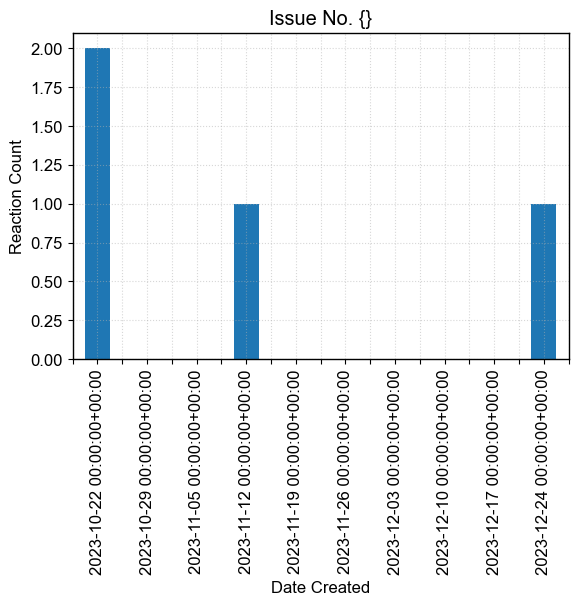

In [30]:
fig, ax = plt.subplots()

# Show date for at most 10 bars on x axis
tick_step_size = round(len(df3['id']) / 10)
df3['id'].plot(kind="bar", stacked=True, ax=ax)

xminor = ax.get_xticks()
ax.xaxis.set_major_locator(MaxNLocator(20))
ax.set_xticks(xminor, minor=True)

# xLabels = ['']*len(df3['id'])
# xLabels[::tick_step_size] = [x.strftime("%Y-%m-%d") for x in df3['id'].index[::tick_step_size]]
# ax.set_xticklabels(xLabels, rotation=45)

# ax.set_yticks(np.arange(df3['id'].max())+1)
plt.xlabel('Date Created')
plt.ylabel('Reaction Count')
plt.title('Issue No. {}') # placeholder
# plt.title('Issue No. {}'.format(args.issue))

# Add padding so the dates don't get cut off.
plt.subplots_adjust(bottom=0.2)
plt.show()